In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import os
import binascii
import seaborn as sns
from scipy.stats import iqr, spearmanr

#### Следуйщая функция принимат на вход относительный путь к папке с файлами, которые нужно классифицировать. Строит гистрограммы шестнадцатеричных символов каждого файла. Возвращает датасет файл:количество каждого символа.

In [15]:
def preparing_data(path):
    df_temp = pd.DataFrame()
    for filename in os.listdir(path):
        with open(path + filename, 'rb') as f:
            # Slurp the whole file and efficiently convert it to hex all at once
            hexdata = binascii.hexlify(f.read())
        hexdata = str(hexdata)
        hexdata = hexdata[2:-1]
#         print("Относительный путь к файлу - ", path + filename)
#         print('Имя файла - ', filename)
#         print('Размер файла: ', len(hexdata))
#         print('Первый символ - ', hexdata[0], ' Последний - ', hexdata[-1])
#         print('-------------------')
        letter_counts = Counter(list(hexdata))
        df_temp = df_temp.append(pd.DataFrame([dict(letter_counts).values()], columns = dict(letter_counts).keys()))
        df = pd.DataFrame.from_dict(letter_counts, orient='index')
        df.plot(kind='bar')
    df_temp = df_temp.reset_index(drop = True)
    return df_temp


c:\programdata\miniconda3\lib\site-packages\pandas\core\frame.py:6201: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  sort=sort)


,0,1,2,3,4,5,6,7,8,9,a,b,c,d,e,f
0,30041,28332,26461,32913,30519,27554,26336,30402,28579,31115,31756,23287,29336,27554,30285,27234
1,47419,44024,43879,43059,41122,43553,42174,39024,44111,40735,41538,39609,45397,37260,39211,37975
2,265410,211544,272553,360954,222004,224201,239617,224265,208367,211561,202845,200169,200467,200540,219303,212886
3,5088,4930,4280,4268,4356,4251,4045,3956,4787,3878,4232,3759,4166,3640,3994,3786
4,11423,4638,14686,4923,7667,9159,32008,17752,150,4292,422,274,3310,3193,2869,3970


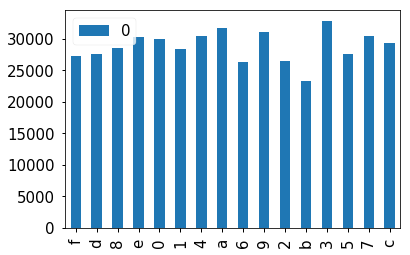

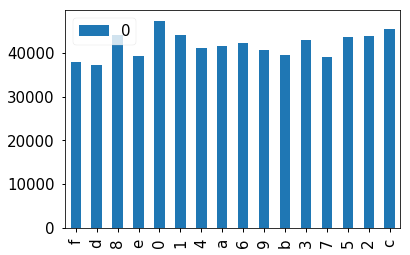

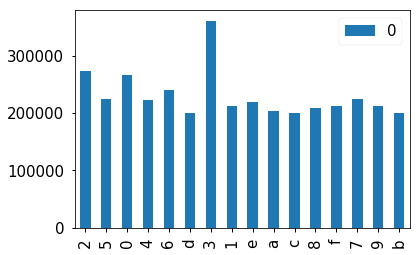

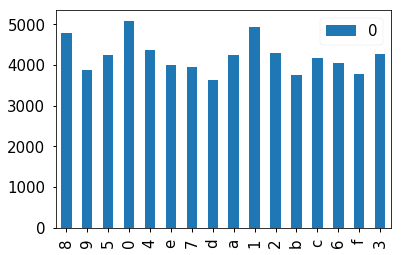

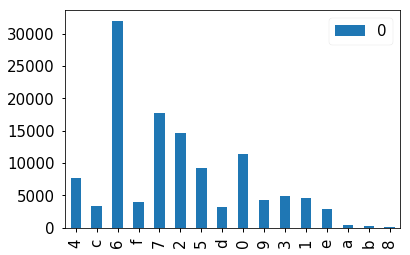

In [16]:
df_stat = preparing_data('./Own_sample_with_extension/')
df_stat

c:\programdata\miniconda3\lib\site-packages\pandas\core\frame.py:6201: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  sort=sort)


,0,1,2,3,4,5,6,7,8,9,a,b,c,d,e,f
0,26206,21213,27631,87905,13881,48911,75647,44289,11370,11494,259,2102,34863,3055,5387,1283
1,83132,79932,86591,324382,37835,152124,290937,149703,53384,44805,276,5948,123746,8995,25822,1084
2,35394,28594,38971,115064,16908,69134,94973,58646,16129,11403,490,2205,47097,3405,6616,1931
3,464948,276842,795898,859675,287246,330583,324958,275210,437303,379815,470249,438656,1046787,141275,279725,142718
4,25216,16370,20694,22260,17396,17983,20173,17708,16484,15725,16937,15665,15955,15091,16376,18701
5,29009,23165,30333,93332,12611,60876,73150,50817,11503,10026,416,1969,39466,2775,4282,1440
6,36490,18327,21716,51412,17226,24415,24445,18835,17367,17593,16479,17324,17800,19592,17617,18800
7,66205,68731,61604,269549,38704,136159,311197,98751,62839,30974,167,4538,127535,7246,18750,4625
8,26066,20866,28352,89793,14230,48244,79050,46087,10777,11884,264,2234,35013,3193,5557,1302
9,24032,14197,22667,21986,16321,16587,19332,16611,13528,14421,13602,13831,14090,15364,15368,16287


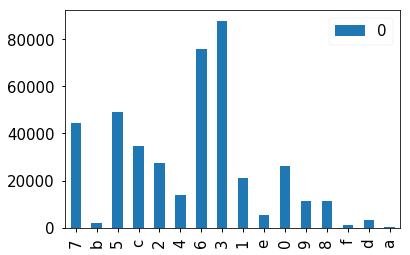

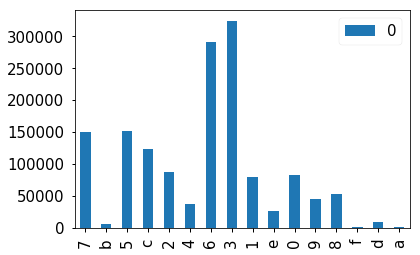

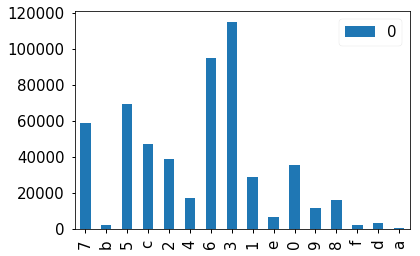

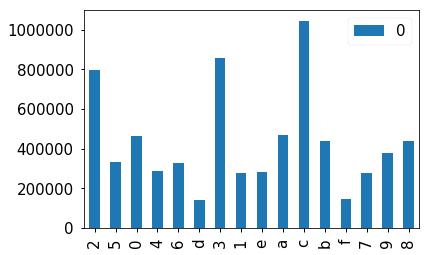

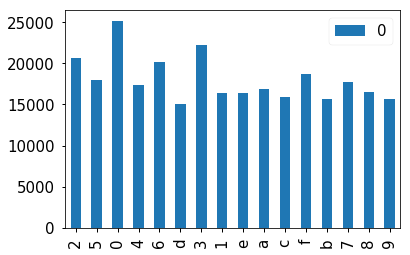

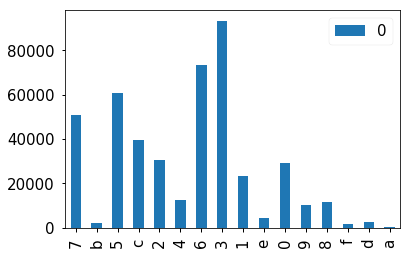

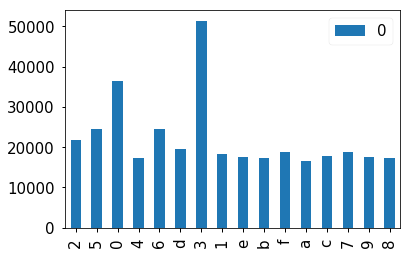

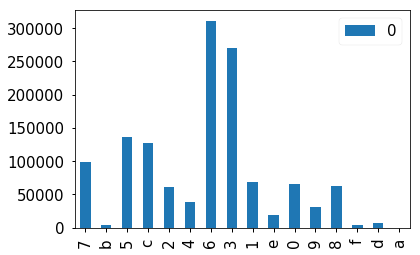

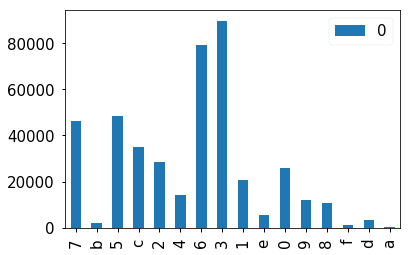

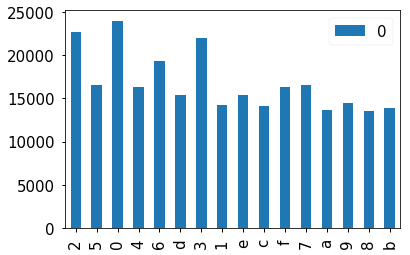

In [17]:
df_stat = preparing_data('./sample_of_files_with_extensions/')
df_stat

## Построим матрицу корреляции Пирсона

In [13]:
#Correlation heatmap
sns.set_context("notebook",font_scale = 1.5, rc={"lines.linewidth": 2.5}) 
font2 = {'family': 'serif', 'color':  'darkred', 'weight': 'normal','size': 16}

corr = df_stat.corr()
corr

,0,1,2,3,4,5,6,7,8,9,a,b,c,d,e,f
0,1.000000,0.989147,0.997811,0.964213,0.998645,0.931916,0.649177,0.919788,0.998631,0.998170,0.985426,0.987309,0.998681,0.978698,0.994707,0.965792
1,0.989147,1.000000,0.979437,0.991757,0.983333,0.973366,0.752824,0.963531,0.987260,0.979540,0.950657,0.954074,0.987111,0.941917,0.970485,0.922072
2,0.997811,0.979437,1.000000,0.949244,0.998660,0.913335,0.608105,0.900638,0.996985,0.999214,0.992629,0.993847,0.998480,0.983086,0.996938,0.973014
3,0.964213,0.991757,0.949244,1.000000,0.953431,0.993910,0.822560,0.987594,0.960053,0.947764,0.905936,0.910648,0.961927,0.892566,0.932908,0.865718
4,0.998645,0.983333,0.998660,0.953431,1.000000,0.918182,0.626223,0.902739,0.999476,0.999200,0.990886,0.992299,0.998835,0.984358,0.997428,0.974456
5,0.931916,0.973366,0.913335,0.993910,0.918182,1.000000,0.871744,0.993519,0.927413,0.909928,0.858927,0.864468,0.930651,0.840875,0.890814,0.810137
6,0.649177,0.752824,0.608105,0.822560,0.626223,0.871744,1.000000,0.866247,0.647742,0.606681,0.515744,0.525099,0.646185,0.500323,0.575417,0.455587
7,0.919788,0.963531,0.900638,0.987594,0.902739,0.993519,0.866247,1.000000,0.910523,0.897638,0.842447,0.848303,0.915444,0.824758,0.877044,0.790635
8,0.998631,0.987260,0.996985,0.960053,0.999476,0.927413,0.647742,0.910523,1.000000,0.997629,0.986668,0.988353,0.998880,0.980197,0.995064,0.969370
9,0.998170,0.979540,0.999214,0.947764,0.999200,0.909928,0.606681,0.897638,0.997629,1.000000,0.993331,0.994579,0.997511,0.987379,0.998753,0.977608


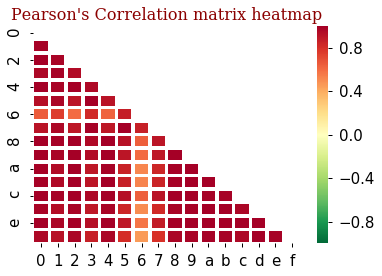

In [14]:
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
plt.title("Pearson's Correlation matrix heatmap",fontdict = font2)
sns.heatmap(corr, cmap = 'RdYlGn_r', vmax = 1., vmin = -1., mask = mask, linewidth = 2.5);

Не помогло

## Теперь матрицу корреляции Спирмена

In [10]:
corrspear = spearmanr(df_stat)
cspfr = pd.DataFrame(corrspear[0], index=df_stat.columns, columns=df_stat.columns)
cspfr

,0,1,2,3,4,5,6,7,8,9,a,b,c,d,e,f
0,1.000000,0.878788,0.781818,0.866667,0.648485,0.878788,0.818182,0.866667,0.757576,0.600000,0.006061,0.248485,0.854545,0.272727,0.660606,0.090909
1,0.878788,1.000000,0.951515,0.987879,0.490909,1.000000,0.939394,0.987879,0.551515,0.381818,-0.187879,-0.066667,0.975758,-0.042424,0.442424,-0.175758
2,0.781818,0.951515,1.000000,0.963636,0.442424,0.951515,0.915152,0.963636,0.478788,0.357576,-0.212121,-0.078788,0.951515,-0.030303,0.418182,-0.200000
3,0.866667,0.987879,0.963636,1.000000,0.503030,0.987879,0.951515,1.000000,0.539394,0.393939,-0.175758,-0.042424,0.987879,-0.030303,0.454545,-0.163636
4,0.648485,0.490909,0.442424,0.503030,1.000000,0.490909,0.551515,0.503030,0.939394,0.903030,0.309091,0.733333,0.515152,0.721212,0.963636,0.478788
5,0.878788,1.000000,0.951515,0.987879,0.490909,1.000000,0.939394,0.987879,0.551515,0.381818,-0.187879,-0.066667,0.975758,-0.042424,0.442424,-0.175758
6,0.818182,0.939394,0.915152,0.951515,0.551515,0.939394,1.000000,0.951515,0.515152,0.442424,-0.272727,-0.006061,0.963636,-0.006061,0.478788,-0.139394
7,0.866667,0.987879,0.963636,1.000000,0.503030,0.987879,0.951515,1.000000,0.539394,0.393939,-0.175758,-0.042424,0.987879,-0.030303,0.454545,-0.163636
8,0.757576,0.551515,0.478788,0.539394,0.939394,0.551515,0.515152,0.539394,1.000000,0.842424,0.345455,0.672727,0.551515,0.696970,0.927273,0.515152
9,0.600000,0.381818,0.357576,0.393939,0.903030,0.381818,0.442424,0.393939,0.842424,1.000000,0.260606,0.806061,0.381818,0.769697,0.963636,0.393939


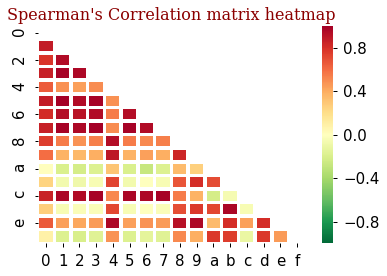

In [11]:
#cspfr = spearmanr(df_stat)
mask = np.zeros_like(cspfr)
mask[np.triu_indices_from(mask)] = True
#seaborn.heatmap(corr, cmap = 'inferno', vmax = 1., vmin = -1., mask = mask, linewidth = 2.5)
plt.title("Spearman's Correlation matrix heatmap",fontdict = font2)
sns.heatmap(cspfr, cmap = 'RdYlGn_r', vmax = 1., vmin = -1., mask = mask, linewidth = 2.5);

Как мы видим, от символов 'a' и 'f' результат зависит больше всего